2.  Use  PCA  to  reduce  the  dimensionality  of  an  image  dataset  and  apply  KNN  for 
classification. 

In [19]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [20]:
data_dir = 'datasets/ORL dataset'
images = []
labels = []

In [21]:
for filename in os.listdir(data_dir):
    img = cv2.imread(os.path.join(data_dir, filename), cv2.IMREAD_GRAYSCALE)
    images.append(img.flatten())
    parts = filename.split('_')
    label = int(parts[1].split(".")[0])
    labels.append(label)

In [22]:
img = cv2.imread('datasets/ORL dataset/1_1.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)

(80, 70)


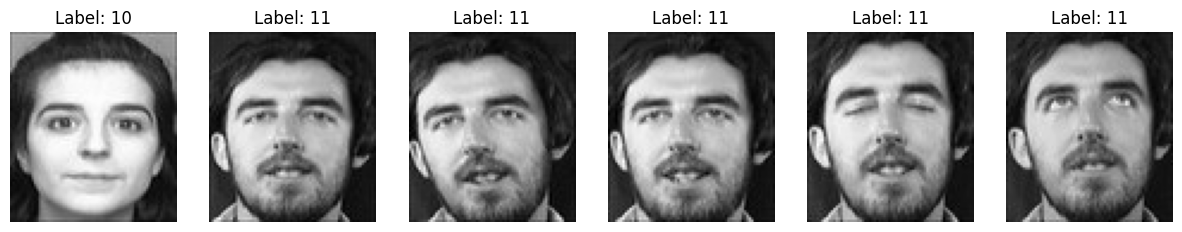

In [ ]:
num_images = 6

plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i].reshape(80, 70), cmap='gray') 
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

In [25]:
X = np.array(images)
y = np.array(labels)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         5
          10       1.00      0.50      0.67         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         5
          14       0.67      1.00      0.80         2
          15       0.75      1.00      0.86         3
          16       0.33      0.50      0.40         2
          17       1.00      0.75      0.86         4
          18       1.00    

d:\Govind\Pattern Recognition-cycle-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Govind\Pattern Recognition-cycle-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Govind\Pattern Recognition-cycle-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

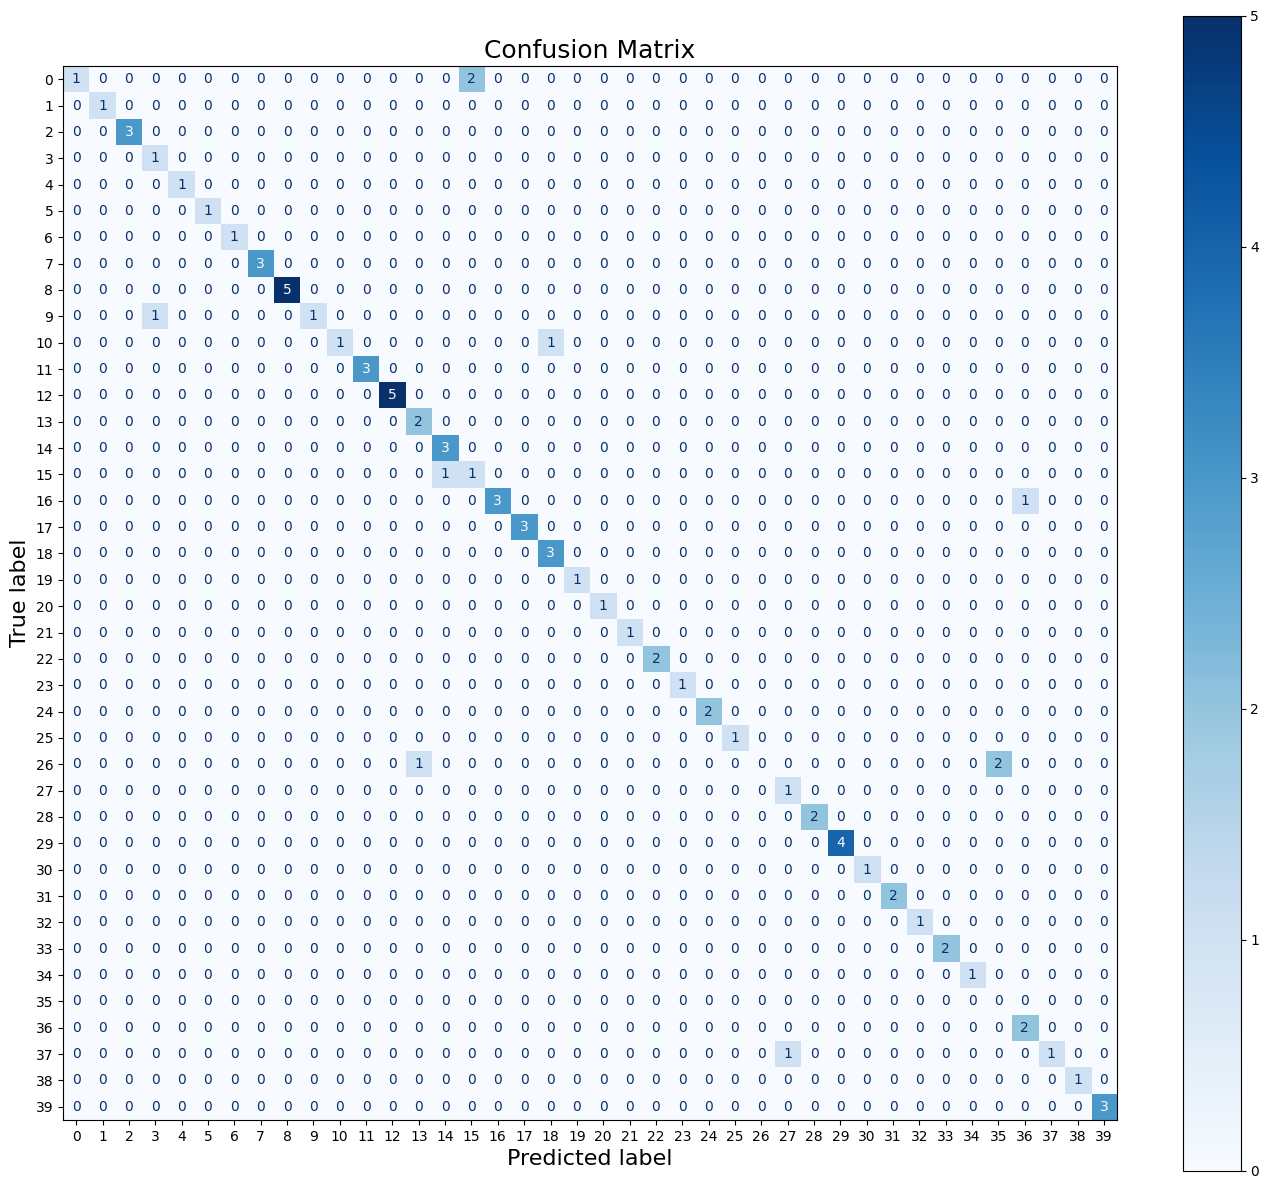

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(17, 15)) 
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()